In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set file path
file_path = '../data/Mushroom_25-05-12_0133.lvm'

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File {file_path} does not exist")
else:
    # Read LVM file
    # LVM files are tab-separated text files without header
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Display basic information about the data
    print(f"Data shape: {data.shape}")
    print("\nFirst 5 rows of data:")
    print(data.head())
    
    # Based on file content, we need to name the columns
    # Assuming first column is timestamp, others are sensor data
    columns = ['Timestamp'] + [f'Sensor_{i}' for i in range(1, data.shape[1])]
    data.columns = columns
    
    print("\nData after renaming columns:")
    print(data.head())


Data shape: (322395, 10)

First 5 rows of data:
               0         1         2         3         4         5         6  \
0  459211.414357 -0.017567 -0.014595 -0.030825 -0.016012 -0.023257 -0.015131   
1  459211.806378 -0.017573 -0.014595 -0.030803 -0.016030 -0.023259 -0.015107   
2  459212.205400 -0.017594 -0.014576 -0.030823 -0.016025 -0.023270 -0.015129   
3  459212.604419 -0.017568 -0.014602 -0.030816 -0.016007 -0.023281 -0.015110   
4  459213.007440 -0.017578 -0.014597 -0.030829 -0.016021 -0.023278 -0.015134   

          7         8   9  
0 -0.035947  0.001177 NaN  
1 -0.035944  0.001211 NaN  
2 -0.035928  0.001177 NaN  
3 -0.035957  0.001193 NaN  
4 -0.035959  0.001184 NaN  

Data after renaming columns:
       Timestamp  Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  \
0  459211.414357 -0.017567 -0.014595 -0.030825 -0.016012 -0.023257 -0.015131   
1  459211.806378 -0.017573 -0.014595 -0.030803 -0.016030 -0.023259 -0.015107   
2  459212.205400 -0.017594 -0.014

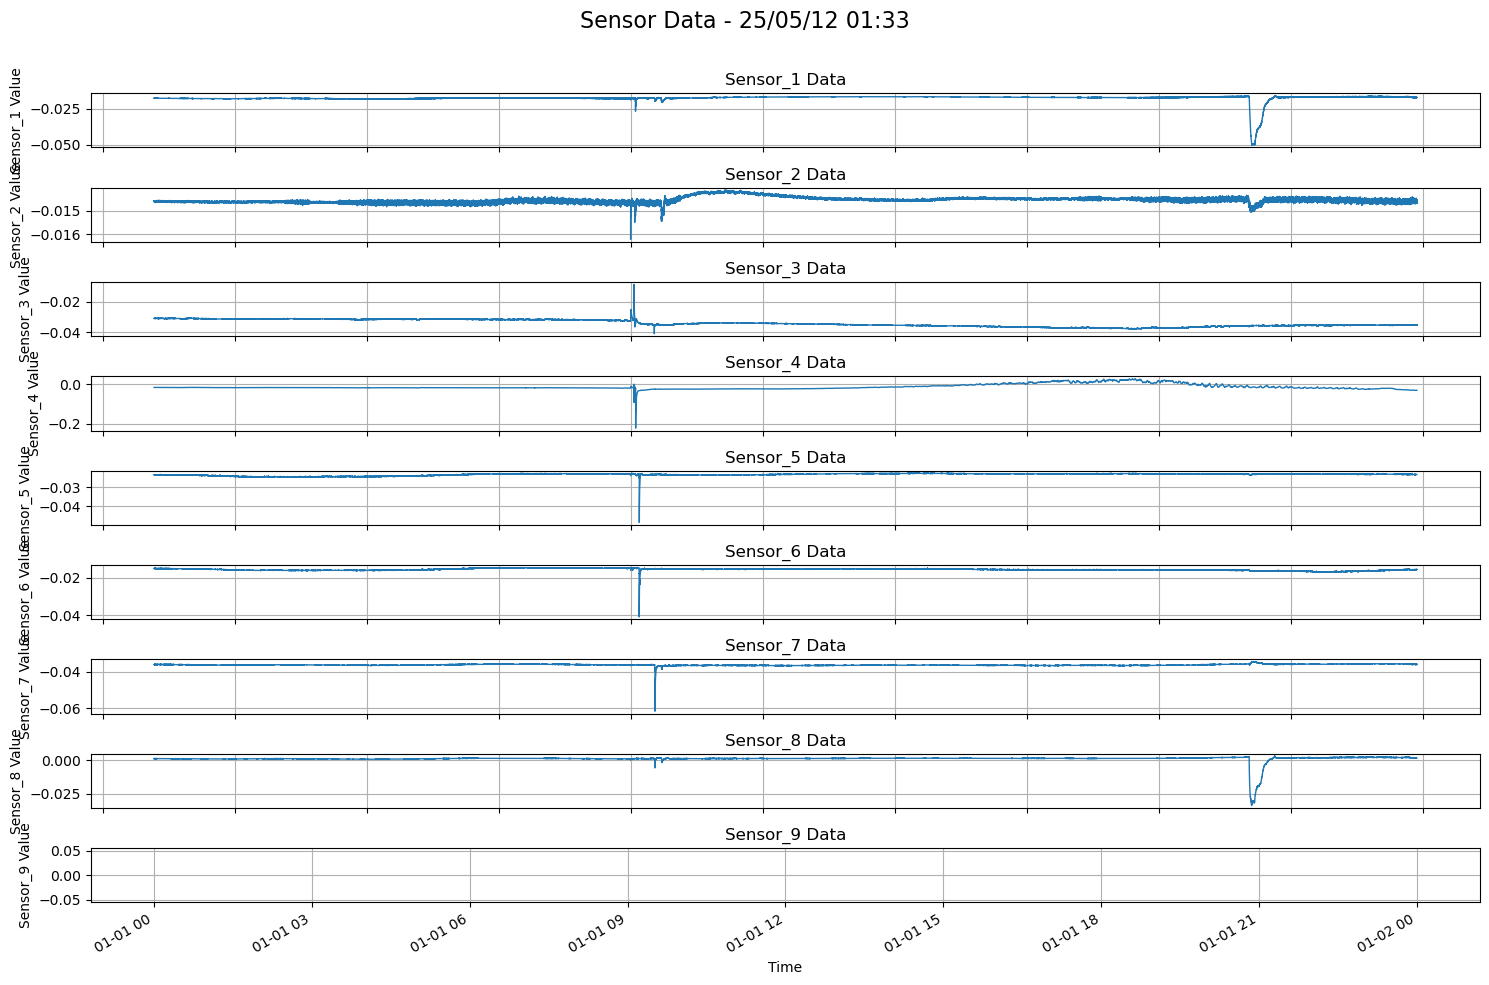

Sensor Statistics:

Sensor_1:
count    322395.000000
mean         -0.017440
std           0.002756
min          -0.050075
25%          -0.017630
50%          -0.017054
75%          -0.016633
max          -0.015825
Name: Sensor_1, dtype: float64

Sensor_2:
count    322395.000000
mean         -0.014554
std           0.000121
min          -0.016226
25%          -0.014631
50%          -0.014562
75%          -0.014497
max          -0.014126
Name: Sensor_2, dtype: float64

Sensor_3:
count    322395.000000
mean         -0.033932
std           0.002201
min          -0.040881
25%          -0.035627
50%          -0.034555
75%          -0.031479
max          -0.008600
Name: Sensor_3, dtype: float64

Sensor_4:
count    322395.000000
mean         -0.013104
std           0.012582
min          -0.223211
25%          -0.019325
50%          -0.017206
75%          -0.011415
max           0.027642
Name: Sensor_4, dtype: float64

Sensor_5:
count    322395.000000
mean         -0.023166
std           0.0005

In [3]:
# Extract date and time information from the filename
file_name = os.path.basename(file_path)  # Get the filename
date_time_str = file_name.split('_')[1:3]  # Extract date and time parts
date_str = date_time_str[0].replace('-', '/')  # Format date
time_str = date_time_str[1].replace('.lvm', '')  # Format time
# Parse time string, first two digits are hours, last two are minutes
hour = time_str[:2]
minute = time_str[2:]
formatted_time = f"{hour}:{minute}"

# Use actual timestamps and convert to specific times
actual_time = data['Timestamp']
# Calculate seconds relative to start time
start_time = actual_time.iloc[0]
relative_seconds = actual_time - start_time

# Create specific time labels
from datetime import datetime, timedelta
# Assume data recording started at the date and time specified in the filename
base_time = datetime(2025, 5, 12, int(hour), int(minute))  # Date and time parsed from filename
time_labels = [base_time + timedelta(seconds=s) for s in relative_seconds]

# Determine the number of sensors in the dataset
num_sensors = len([col for col in data.columns if 'Sensor_' in col])

# Create a figure with subplots for all sensors
plt.figure(figsize=(15, 10))

# Plot data for all sensors
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    plt.subplot(num_sensors, 1, i)
    plt.plot(time_labels, data[sensor_name], linewidth=1)
    plt.title(f'{sensor_name} Data')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    
    # Only add x-label for the bottom subplot
    if i == num_sensors:
        plt.xlabel('Time')
    
    plt.gcf().autofmt_xdate()  # Automatically format x-axis date labels

# Add a main title for the entire figure
plt.suptitle(f'Sensor Data - {date_str} {formatted_time}', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the suptitle

# Display the figure
plt.show()

# Print basic statistics for all sensors
print("Sensor Statistics:")
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    print(f"\n{sensor_name}:\n{data[sensor_name].describe()}")


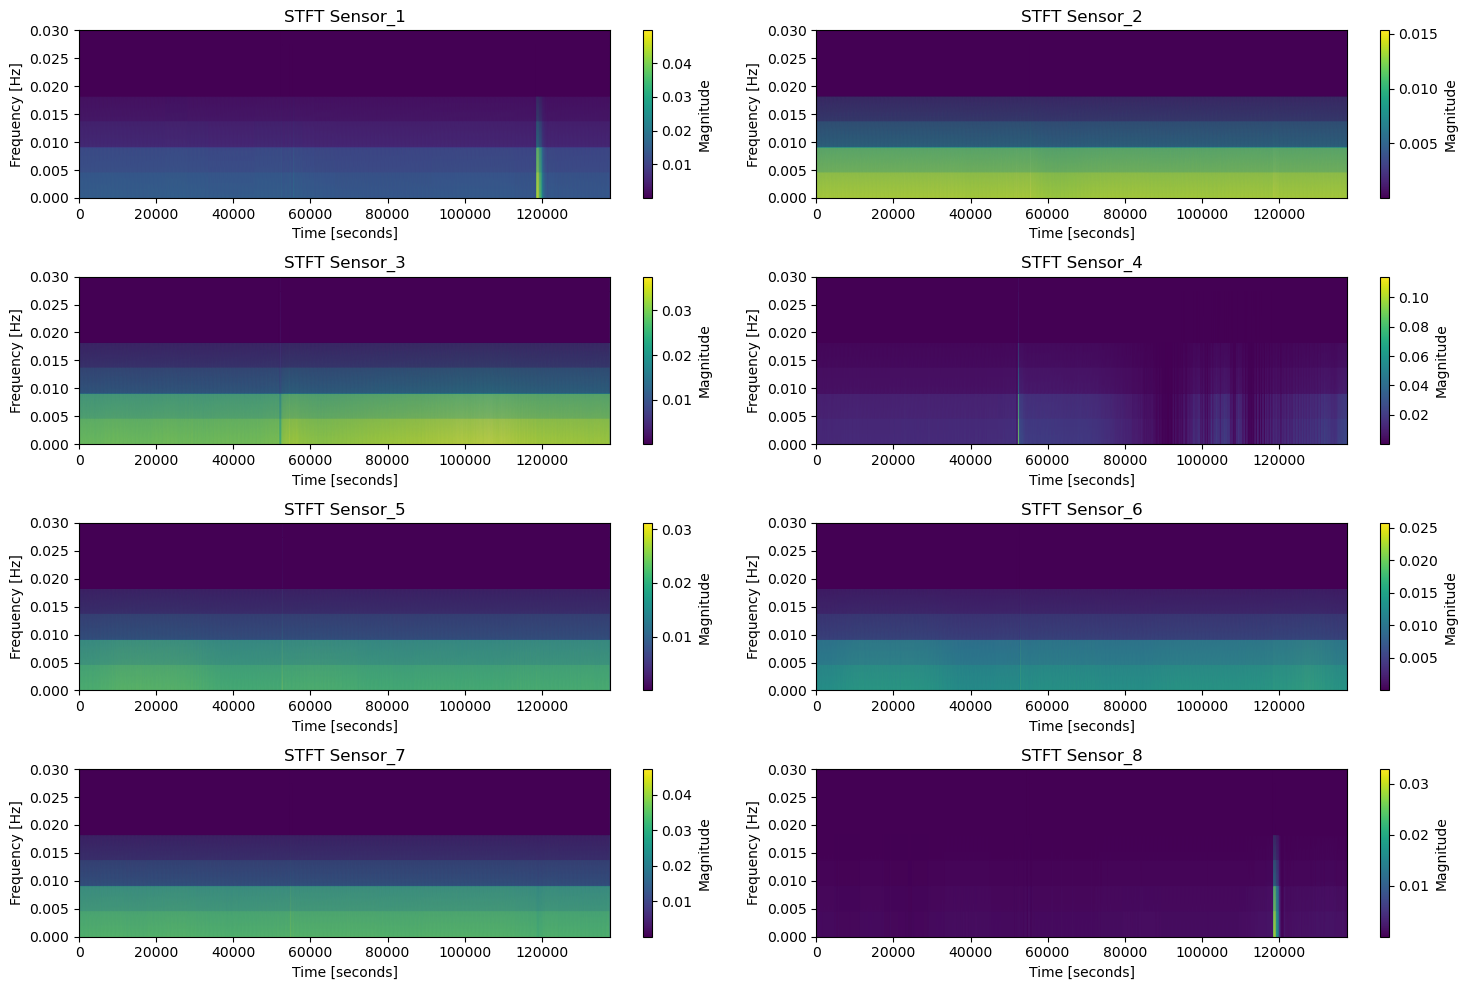

STFT analysis completed
Sampling rate: 2.34 Hz
Frequency resolution: 0.0091 Hz
Time resolution: 54.6806 seconds


In [17]:
# Perform Short-Time Fourier Transform (STFT) analysis
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for STFT analysis
plt.figure(figsize=(15, 10))

# Perform STFT on all sensor data
for i in range(1, 9):  # Assuming 8 sensors
    sensor_name = f'Sensor_{i}'
    
    # Get sensor data
    sensor_data = data[sensor_name].values
    
    # Calculate sampling rate (based on timestamp differences)
    sampling_rate = 1.0 / np.mean(np.diff(data['Timestamp']))
    
    # Perform STFT
    f, t, Zxx = signal.stft(sensor_data, fs=sampling_rate, nperseg=256)
    
    # Plot STFT results
    plt.subplot(4, 2, i)
    
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    plt.title(f'STFT {sensor_name}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seconds]')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)  # Limit y-axis to 0.03Hz

plt.tight_layout()
plt.show()

# Print basic information about the STFT analysis
print(f"STFT analysis completed")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Frequency resolution: {f[1]-f[0]:.4f} Hz")
print(f"Time resolution: {t[1]-t[0]:.4f} seconds")
